
<a href="https://colab.research.google.com/github/kokchun/Machine-learning-AI22/blob/main/Exercises/E01_gradient_descent.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Gradient descent exercises

---
These are introductory exercises in Machine learning with focus in **gradient descent** .

<p class = "alert alert-info" role="alert"><b>Note</b> all datasets used in this exercise can be found under Data folder of the course Github repo</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 0. Simulate dataset (*)

Simulate datasets according to these rules:

- set random seed to 42
- (1000,2) samples from $X \sim \mathcal{U}(0,1)$ , i.e. 1000 rows, 2 columns. 
- 1000 samples from $\epsilon \sim \mathcal{N}(0,1)$
- $y = 3x_1 + 5x_2 + 3 + \epsilon$ , where $x_i$ is column $i$ of $X$

Finally add a column of ones for the intercept to $X$.

<details>

<summary>Hint</summary>

Use for simulating X

´´´
np.random.rand(samples, 2)
´´´

to concatenate with ones, use ```np.c_[..., ...]```

</details>

<details>

<summary>Answer</summary>

```
array([[1.        , 0.37454012, 0.95071431],
       [1.        , 0.73199394, 0.59865848],
       [1.        , 0.15601864, 0.15599452],
       [1.        , 0.05808361, 0.86617615],
       [1.        , 0.60111501, 0.70807258]])

```

</details>

---

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [66]:
np.random.seed(42)
X = np.random.rand(1000, 2)
y = 3 * X[:, 0] + 5 * X[:, 1] + 3 + np.random.randn(1000)
X = np.c_[np.ones(X.shape[0]), X]
y.shape

(1000,)

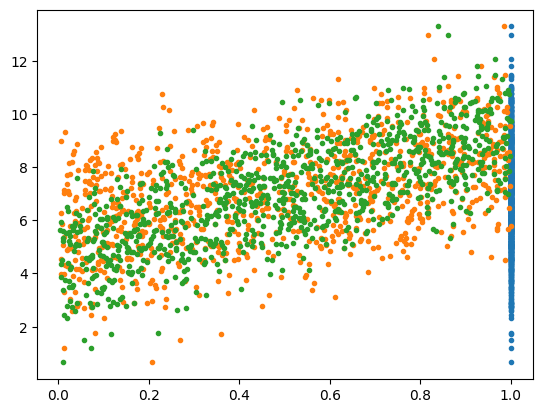

In [67]:
plt.plot(X, y, '.'); plt.show()

## 1. Gradient descent - learning rate (*)

Use gradient descent to calculate $\vec{\theta} = (\theta_0, \theta_1, \theta_2)^T$ 

&nbsp; a) Use $\eta = 0.1$ and calculate $\vec{\theta}$ for each fifth epoch from 1 to 500. So the procedure is as follows:
- calculate $\vec{\theta}$ for epochs = 1
- calculate $\vec{\theta}$ for epochs = 6
- ...
- calculate $\vec{\theta}$ for epochs = 496

Plot these $\vec{\theta}$ values against epochs. (*)

&nbsp; b) Do the same as for a) but with learning rate $\eta = 0.01$, 5000 epochs and for each 20th epoch. What do you notice when changing the learning rate? (*)

&nbsp; c) Experiment with larger and smaller $\eta$ and see what happens.

<details>

<summary>Answer</summary>

a) 

<img src="../assets/grad_desc_converg.png" height="200"/>

b) 

<img src="../assets/grad_desc_converg_001.png" height="200"/>

</details>

---

In [104]:
def GD5(X, y, lr=0.1):
    
    m, n = X.shape
    theta = np.random.randn(n)
    epochs = range(1, 500, 5)
    theta_list = []
    
    for _ in epochs:
        gradient = (2 / m) * X.T @ ((X @ theta)- y)
        theta -= lr * gradient
        theta_list.append(theta)

    theta_list = np.array(theta_list)
    
    return theta, epochs, theta_list


def GD20(X, y, lr=0.01):
    
    m, n = X.shape
    theta = np.random.randn(n)
    epochs = range(1, 5000, 20)
    theta_list = []
    
    for _ in epochs:
        gradient = (2 / m) * X.T @ ((X @ theta)- y)
        theta -= lr * gradient
        theta_list.append(theta)
    
    theta_list = np.array(theta_list)
    
    return theta, epochs, theta_list

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

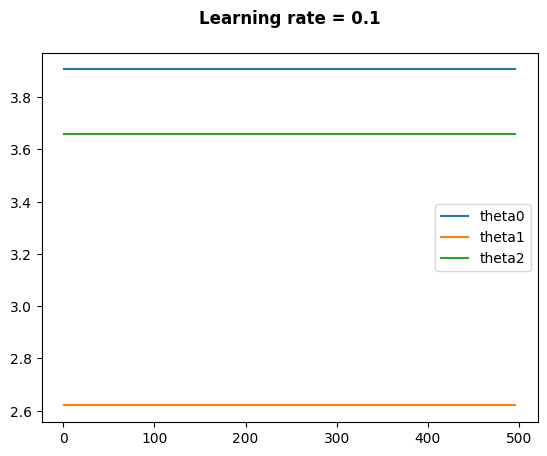

In [121]:
theta5, epochs5, theta5_list = GD5(X_train, y_train)
theta20, epochs20, theta20_list = GD20(X_train, y_train)

fig, ax = plt.subplots()
ax.plot(epochs5, theta5_list, label=["theta0", "theta1", "theta2"])
ax.legend()
ax.set_title('Learning rate = 0.1\n', fontweight='bold')
plt.show()

In [122]:
theta20_list

array([[4.72248761, 1.15092022, 3.54075765],
       [4.72248761, 1.15092022, 3.54075765],
       [4.72248761, 1.15092022, 3.54075765],
       [4.72248761, 1.15092022, 3.54075765],
       [4.72248761, 1.15092022, 3.54075765],
       [4.72248761, 1.15092022, 3.54075765],
       [4.72248761, 1.15092022, 3.54075765],
       [4.72248761, 1.15092022, 3.54075765],
       [4.72248761, 1.15092022, 3.54075765],
       [4.72248761, 1.15092022, 3.54075765],
       [4.72248761, 1.15092022, 3.54075765],
       [4.72248761, 1.15092022, 3.54075765],
       [4.72248761, 1.15092022, 3.54075765],
       [4.72248761, 1.15092022, 3.54075765],
       [4.72248761, 1.15092022, 3.54075765],
       [4.72248761, 1.15092022, 3.54075765],
       [4.72248761, 1.15092022, 3.54075765],
       [4.72248761, 1.15092022, 3.54075765],
       [4.72248761, 1.15092022, 3.54075765],
       [4.72248761, 1.15092022, 3.54075765],
       [4.72248761, 1.15092022, 3.54075765],
       [4.72248761, 1.15092022, 3.54075765],
       [4.

## 2. Stochastic Gradient Descent - learning rate (**)

Repeat task 1 but using stochastic gradient descent instead. Also adjust number of epochs to see if you can find convergence. What kind of conclusions can you draw from your experiments. (**)

---

## 3. Mini Batch Gradient Descent (**)

Now try different sizes of mini-batches and make some exploratory plots to see convergence. Also you can make comparison to the other algorithms by using same $\eta$ and same amount of epochs to see how they differ from each other in terms of convergence. (**)

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---